## Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

# Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.compose import ColumnTransformer

In [29]:
def get_data_tranformer():
    num_columns=['reading_score','writing_score']
    cat_columns=[
                'gender',
                'race_ethnicity',
                'parental_level_of_education',
                'lunch',
                'test_preparation_course'
                ]
            
    num_pipeline = Pipeline(
                steps=[
                    ("imputer",SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
                ]
            )
    cat_pipeline = Pipeline(
                steps=[
                    ('imputer',SimpleImputer(strategy='most_frequent')),
                    ('onehotencoding',OneHotEncoder()),
                    ('scaler',StandardScaler(with_mean=False))
                ]
            )
    preprocessor= ColumnTransformer(
                [
                    ('numerical_pipeline',num_pipeline,num_columns),
                    ("categorical_pipeline",cat_pipeline,cat_columns)
                ]
            )

    return preprocessor

In [30]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')
target_column_name="math_score"
input_feature_train_df=train_df.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_df[target_column_name]
input_feature_test_df=test_df.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_df[target_column_name]

In [38]:
obj=get_data_tranformer()
train_arr=obj.fit_transform(input_feature_train_df)
tes_arr=obj.transform(input_feature_test_df)
training_arr = np.c_[
                train_arr, np.array(target_feature_train_df)
            ]
training_arr


array([[ 3.07905414e-02,  4.34053378e-01,  2.00276196e+00, ...,
         0.00000000e+00,  2.09830697e+00,  6.20000000e+01],
       [ 9.30289504e-01,  9.64701252e-01,  2.00276196e+00, ...,
         2.09830697e+00,  0.00000000e+00,  6.60000000e+01],
       [ 1.34544287e+00,  1.16369420e+00,  2.00276196e+00, ...,
         0.00000000e+00,  2.09830697e+00,  7.90000000e+01],
       ...,
       [-5.22747282e-01, -1.02522827e+00,  2.00276196e+00, ...,
         0.00000000e+00,  2.09830697e+00,  5.30000000e+01],
       [-1.49143847e+00, -1.02522827e+00,  0.00000000e+00, ...,
         2.09830697e+00,  0.00000000e+00,  5.00000000e+01],
       [ 1.48382733e+00,  1.36268716e+00,  2.00276196e+00, ...,
         0.00000000e+00,  2.09830697e+00,  8.50000000e+01]])

In [2]:
df= pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Checking for missing values

In [3]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values found in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### OBSERVATIONS : There are 5 categorical columns and 3 numerical columns

##### Checking unique values in each column

In [5]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data

In [100]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Unique Categories in each categorical columns

In [7]:
columns=df.columns
categorical_features= [cols for cols in columns if df[cols].dtype=='O']
numeric_features= [cols for cols in columns if df[cols].dtype!='O']
for col in categorical_features:
    print("The unique categories in the column '{0}' are :".format(col))
    print(*df[col].unique(),sep=" , ")
    print()

The unique categories in the column 'gender' are :
female , male

The unique categories in the column 'race_ethnicity' are :
group B , group C , group A , group D , group E

The unique categories in the column 'parental_level_of_education' are :
bachelor's degree , some college , master's degree , associate's degree , high school , some high school

The unique categories in the column 'lunch' are :
standard , free/reduced

The unique categories in the column 'test_preparation_course' are :
none , completed



## Maximum score holders count and failures count

In [8]:
df['Average']=(df['math_score']+df['reading_score']+df['writing_score'])/3
df['Total Score']=df['math_score']+df['reading_score']+df['writing_score']
numeric_features

['math_score', 'reading_score', 'writing_score']

In [69]:
reading_full = df[df['reading_score'] == 100]['Average'].value_counts().sum()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()
print("The no. students scored maximum marks in 'reading_score' are {}.".format(reading_full))
print("The no. students scored maximum marks in 'writing_score' are {}.".format(writing_full))
print("The no. students scored maximum marks in 'math_score' are {}.".format(math_full))

The no. students scored maximum marks in 'reading_score' are 17.
The no. students scored maximum marks in 'writing_score' are 14.
The no. students scored maximum marks in 'math_score' are 7.


In [103]:
reading_failures = df[df['reading_score']<=40]['Average'].value_counts().sum()
writing_failures = df[df['writing_score']<=40]['Average'].value_counts().sum()
math_failures = df[df['math_score']<=40]['Average'].value_counts().sum()

print("The no. students scored failed marks in 'reading_score' are {}.".format(reading_failures))
print("The no. students scored failed marks in 'writing_score' are {}.".format(writing_failures))
print("The no. students scored failed marks in 'math_score' are {}.".format(math_failures))

The no. students scored failed marks in 'reading_score' are 1.
The no. students scored failed marks in 'writing_score' are 3.
The no. students scored failed marks in 'math_score' are 4.


# VISUALIZATION

### Average distribution for male and female

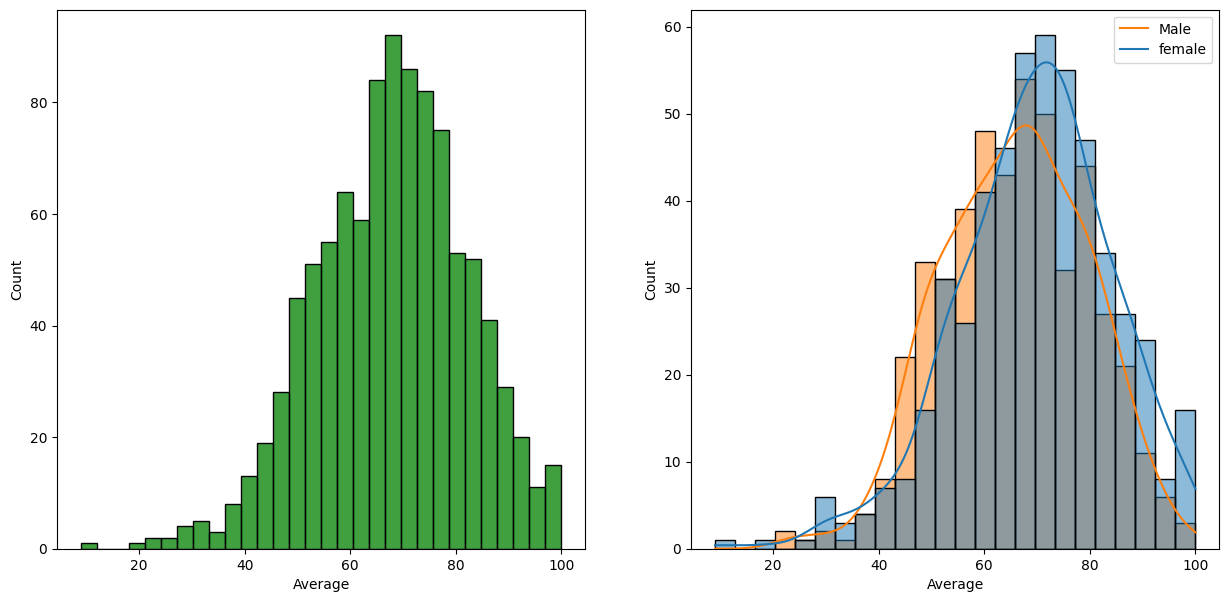

In [104]:
import seaborn as sns
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',hue='gender',kde=True)
plt.legend(['Male','female'])

### Total score and Gender

<Axes: xlabel='Total Score', ylabel='Count'>

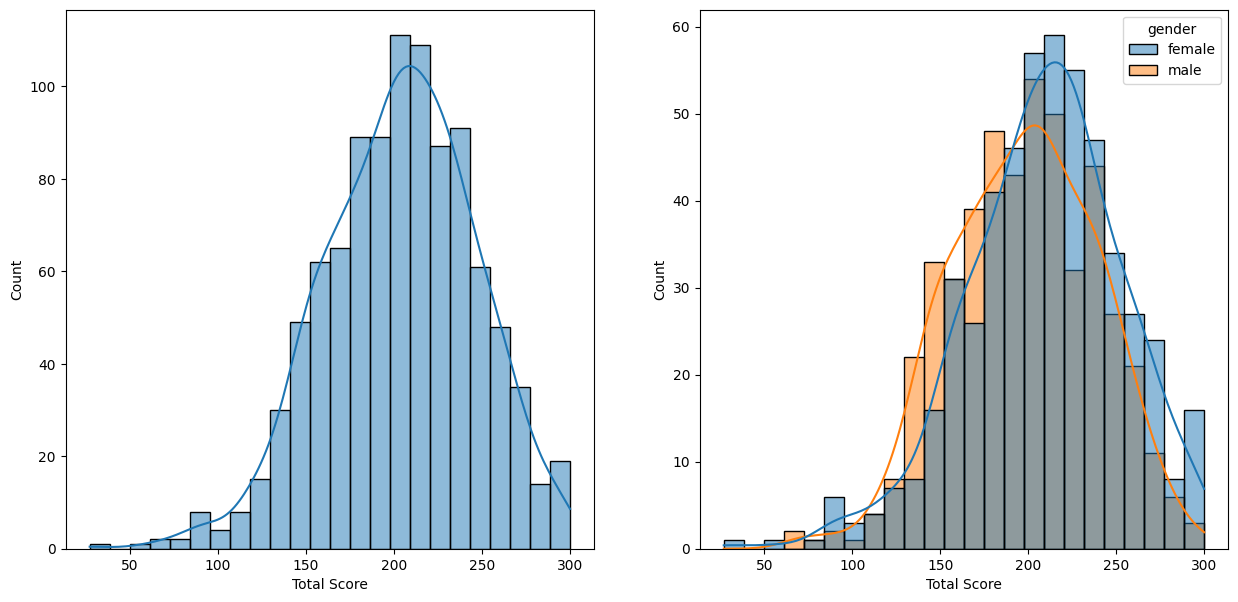

In [112]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')

#### Observations :  Female students performed higher than male

In [113]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Average', 'Total Score'],
      dtype='object')

<Axes: xlabel='Average', ylabel='Count'>

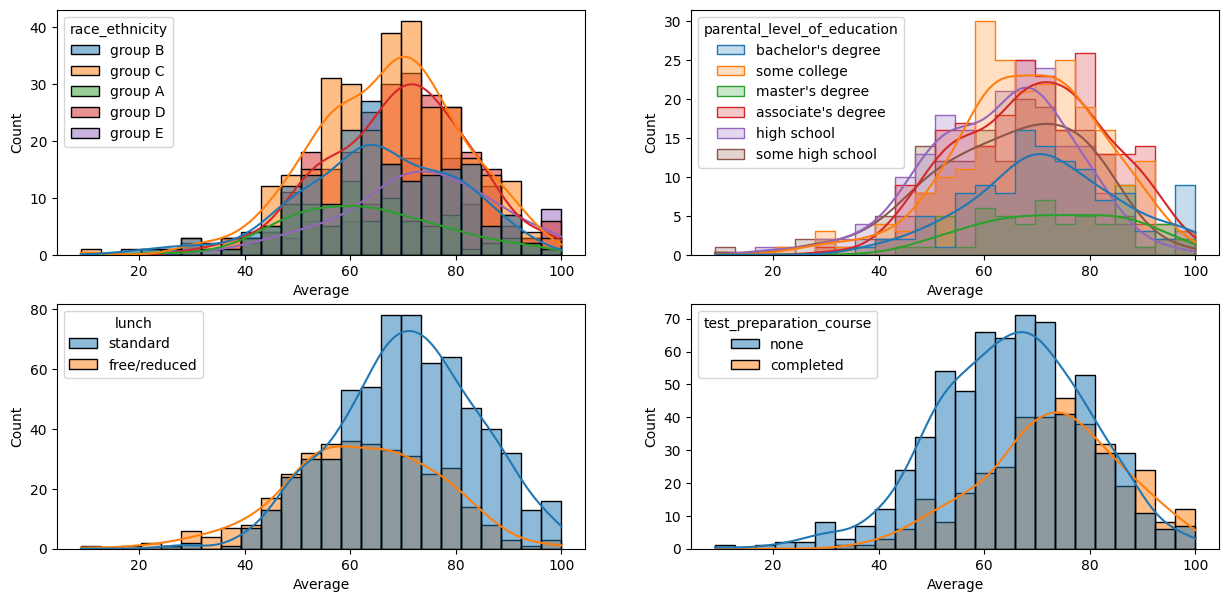

In [122]:
figure,axis=plt.subplots(2,2,figsize=(15,7))
plt.subplot(221)
sns.histplot(x='Average',data=df,hue='race_ethnicity',kde=True)
plt.subplot(222)
sns.histplot(x='Average',data=df,hue='parental_level_of_education',kde=True,element='step')
plt.subplot(223)
sns.histplot(x='Average',data=df,hue='lunch',kde=True)
plt.subplot(224)
sns.histplot(x='Average',data=df,hue='test_preparation_course',kde=True)

#### OBSERVATIONS :- 1.standard lunch students performed better than free/reduced/  2.group C and D students performed better   

## Pie Chart visulaization

In [137]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Average', 'Total Score'],
      dtype='object')

Text(0.5, 1.0, 'Test Preparationn Course')

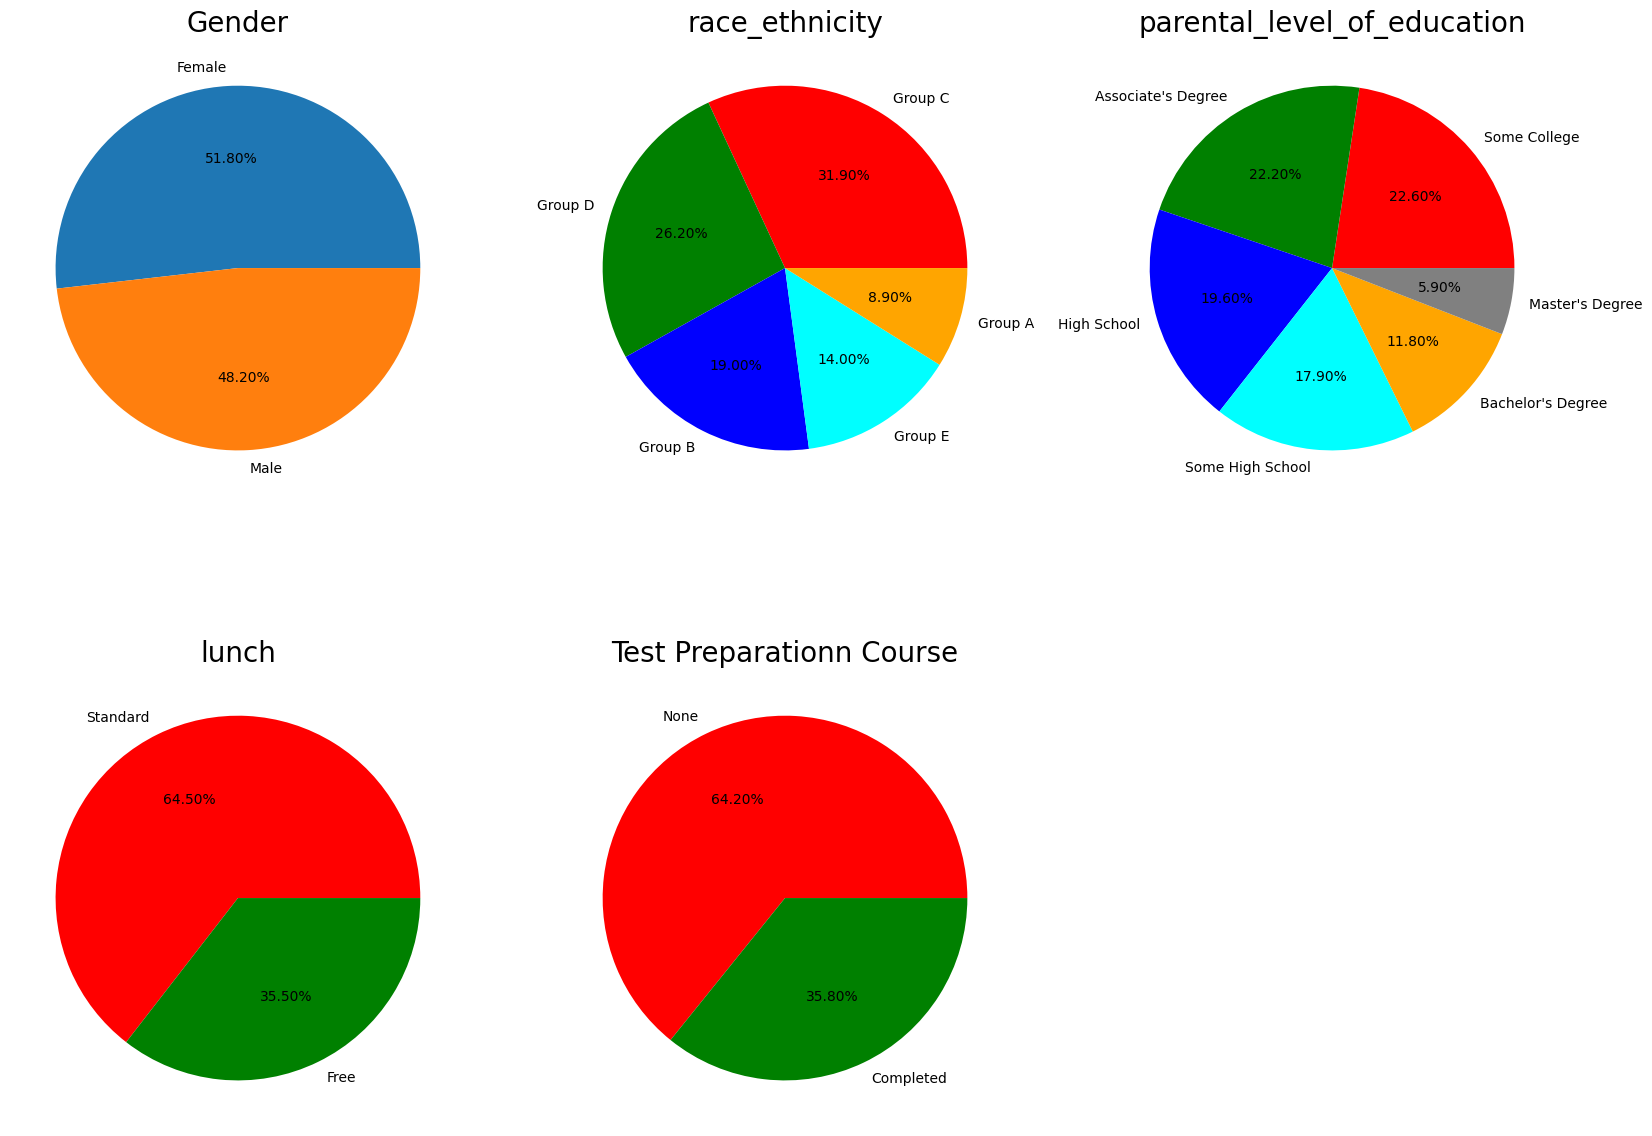

In [150]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(2,3,1)
plt.pie(df['gender'].value_counts(),autopct='%1.2f%%',labels=['Female', 'Male'])
plt.title('Gender', fontsize = 20)

plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('parental_level_of_education', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 4)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(2,3,5)
size=df['test_preparation_course'].value_counts()
plt.pie(size,labels=['None','Completed'],colors=['red','green'],autopct='%1.2f%%')
plt.title('Test Preparationn Course',fontsize=20)
